# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 135MB/s]


Начнем с необходимых приготовлений.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [58]:
coins = pd.read_csv('coins.csv', index_col='date')

Посмотрим что получилось

In [4]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


In [5]:
coins.tail()

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08
2018-06-06,1.270000,795.0,6.094435e+06,599.0,ZRX,0x,1.270000,1.340000,1.250000,1.330000,17778000.0,6.741510e+08


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [8]:
coins['name'].nunique()

70

Ответ: если считать по 'name', то различных монет 70.

In [9]:
coins['symbol'].nunique()

66

Если считать по 'symbols', то различных символов будет 66. Значит, какие-то сокращения совпадают.

In [11]:
coins.shape

(37588, 12)

### 2. За какой период данные мы имеем? (0.4 балла)

In [13]:
start_date = coins.index.min()
end_date = coins.index.max()

print("We have data from ", start_date, " to ", end_date)

We have data from  2013-04-28  to  2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

В связи с тем, что в нашем датафрейме есть одинаковые индексы (одинаковые даты), что крайне неудобно, введем все же порядковые индексы 0, 1, 2 ..., а даты вставим отдельным столбцом 'date'

In [14]:
indexes = coins.index
coins = coins.reset_index(drop=True)
coins['date'] = indexes
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market,date
0,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09,2013-04-28
1,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07,2013-04-28
2,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09,2013-04-29
3,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07,2013-04-29


In [15]:
print(coins.isnull().sum())

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
date                  0
dtype: int64


Видим, что пропуски в данных есть в следующих ячейках:

price - цена монеты

txCount - количество транзакций в сети данной монеты

txVolume - объем монет переведенных между адресами в сети данной монеты

activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты

In [16]:
txcount = coins['txCount'].isnull()
a1 = [coins['name'][ind] for ind in txcount.index if txcount[ind]]

no_txcount = set(a1)
print(len(no_txcount), no_txcount)

20 {'Kyber Network', 'Augur', 'Aeternity', 'Bitgem', 'Stellar', 'TenX', 'Gnosis', 'KuCoin Shares', 'Bitmark', 'Bitcoin Cash', 'Iconomi', 'KingN Coin', 'Bitcoin Gold', 'Waves', 'QASH', 'Lisk', 'EOS', 'FunFair', 'ICON', 'NEO'}


 У нас у 20 различных монет отсутвует информация о количестве транзакций в сети данных монет. Выше можно посмотреть на названия этих монет. 


In [87]:
prices = coins['price'].isnull()
a2 = [coins['name'][ind] for ind in prices.index if prices[ind]]

no_price = set(a2)
print(no_price)

{'VeChain', 'KingN Coin', 'Bitmark'}


У трех монет отсутвует информация о цене.

In [88]:
txvolume = coins['txVolume'].isnull()
a3 = [coins['name'][ind] for ind in txvolume.index if txvolume[ind]]

no_txvolume = set(a3)
print(len(no_txvolume), no_txvolume)

21 {'ICON', 'Augur', 'EOS', 'KingN Coin', 'FunFair', 'Bitcoin Gold', 'Bitcoin Cash', 'Bitmark', 'Bitgem', 'VeChain', 'Iconomi', 'Waves', 'Gnosis', 'KuCoin Shares', 'Kyber Network', 'Stellar', 'Lisk', 'QASH', 'Aeternity', 'NEO', 'TenX'}


У 21 монеты отсутвует информация об объеме монет, переведенных между адресами данных монет.

In [89]:
activeadd = coins['activeAddresses'].isnull()
a4 = [coins['name'][ind] for ind in activeadd.index if activeadd[ind]]

no_activeadd = set(a4)
print(len(no_activeadd), no_activeadd)

20 {'ICON', 'Augur', 'EOS', 'KingN Coin', 'FunFair', 'Bitcoin Gold', 'Bitcoin Cash', 'Bitmark', 'Bitgem', 'Iconomi', 'Waves', 'Gnosis', 'KuCoin Shares', 'Kyber Network', 'Stellar', 'Lisk', 'QASH', 'Aeternity', 'NEO', 'TenX'}


In [90]:
print(len(no_txcount & no_activeadd))
print(no_txvolume - no_activeadd)

20
{'VeChain'}


Видим, что у тех монет, у которых отсутвует информация об объеме транзакций, отсутвует информация о количестве транзакций, что очень логично, потому что это в общем-то это один и тот же параметр.

Пропуски могут быть связаны с тем, что эти монеты новые на рынке и не успевают отладить систему записи транзакций. Другое предположение заключается в том, что какие-то монеты используются для нелегальной торговли и поэтому естестественно не ведут учет проведенных транзакций.

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [17]:
max_index = coins['price'].idxmax()
max_price = coins['price'].max()
max_coin = coins.loc[max_index, 'name']
max_date = coins.loc[max_index, 'date']
print(f"Самая высокая цена была у монеты {max_coin} ({max_price} USD) {max_date}")

Самая высокая цена была у монеты Bitcoin (19475.8 USD) 2017-12-17


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

In [59]:
unique_coins = coins['name'].unique()
max_market = coins[coins.index == end_date]['market'].max()
min_market = coins[coins.index == end_date]['market'].min()
c_max = coins[coins['market'] == max_market]['name'].item()
print(f"Самая высокая капитализация была у монеты {c_max}")
c_min = coins[coins['market'] == min_market]['name'].item()
print(f"Самая низкая капитализация была у монеты {c_min}")

Самая высокая капитализация была у монеты Bitcoin
Самая низкая капитализация была у монеты KingN Coin


<ipython-input-68-26a81fb9d578>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  only_9_the_biggest = groups.append(pd.Series({'Остальные монеты': others}))


([<matplotlib.patches.Wedge at 0x7f6c336c98b0>,
 [Text(0.10882724212239946, 1.0946034128267794, 'Bitcoin'),
  Text(-0.9702058367070114, -0.518363419252987, 'Ethereum'),
  Text(-0.18250627115466098, -1.084754101623599, 'Bitcoin Cash'),
  Text(0.22089963302043303, -1.0775914588244648, 'EOS'),
  Text(0.453403079817723, -1.0022103807144505, 'Litecoin'),
  Text(0.5915388686971078, -0.9274059342168057, 'Cardano'),
  Text(0.7035729024996722, -0.8455679575694593, 'Stellar'),
  Text(0.7895687807449076, -0.7658858534226888, 'TRON'),
  Text(0.8517957321782631, -0.6960201366648072, 'NEO'),
  Text(1.0432811659233723, -0.348660879408013, 'Остальные монеты')])

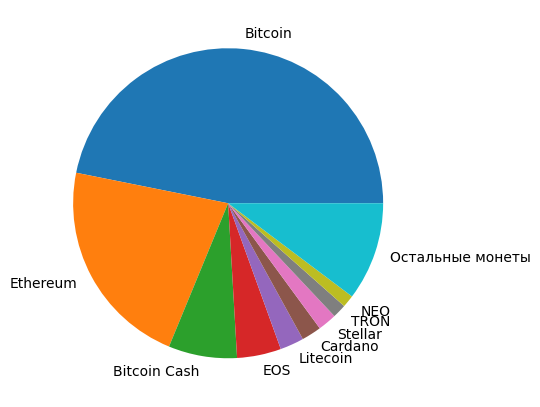

In [68]:
groups = coins.groupby('name').last().market.sort_values(ascending=False)[0:9]
others = sum(coins.groupby('name').last().market.sort_values(ascending=False)[10:].values)
only_9_the_biggest = groups.append(pd.Series({'Остальные монеты': others}))

figure = plt.subplots(figsize=(5, 10))  
plt.pie( 
    only_9_the_biggest, 
    labels= only_9_the_biggest.index
)

([<matplotlib.patches.Wedge at 0x7f6c3378fa30>,
 [Text(1.0999936402753627, 0.0037405018053999622, '0x'),
  Text(1.0999444449486577, 0.011055226211594434, 'Aeternity'),
  Text(1.0998739018528945, 0.016655330164537775, 'Aion'),
  Text(1.0998211160358895, 0.019837155077543644, 'Aragon'),
  Text(1.0996769793974077, 0.0266559746284641, 'Augur'),
  Text(1.099419572372619, 0.03572959395245999, 'Basic Attention Token'),
  Text(1.0989908539867463, 0.04710735455830541, 'Binance Coin'),
  Text(-0.2653866123829087, 1.0675064149539917, 'Bitcoin'),
  Text(-0.8965149562319404, -0.6373860158902469, 'Bitcoin Cash'),
  Text(-0.7559037380439576, -0.7991304892263668, 'Bitcoin Gold'),
  Text(-0.744360521568738, -0.8098934583819755, 'Bitgem'),
  Text(-0.7443054698403189, -0.8099440521207514, 'Bitmark'),
  Text(-0.7416826610466277, -0.8123464964550493, 'Bytom'),
  Text(-0.6937591963437378, -0.8536382005794324, 'Cardano'),
  Text(-0.6459861378118468, -0.8903380873325222, 'Centrality'),
  Text(-0.6443496585370

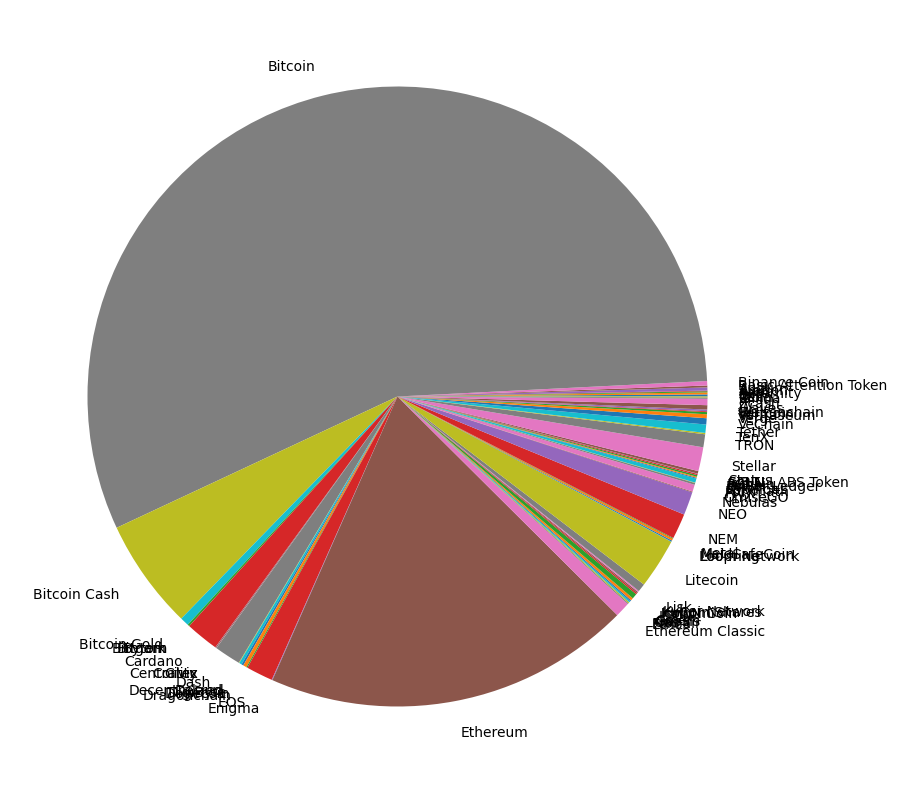

In [69]:
chosen_coin = coins.groupby('date').get_group('2018-06-06')

unique_coins = coins['name'].unique()
group = coins.groupby('name')
figure = plt.subplots(figsize=(10, 20))  
plt.pie( 
    group['market'].sum(), 
    labels= group['market'].sum().index 
)

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [70]:
!pip install matplotlib pandas
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt

coins = pd.read_csv('coins.csv', index_col='date')

In [72]:
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_fancy_price_action(coins, symbol, start_date, end_date):
    filtered_data = coins[coins['symbol'] == symbol]
    filtered_data = filtered_data[(filtered_data.index >= start_date) & (filtered_data.index <= end_date)]
    filtered_data = filtered_data.loc[:,['high', 'low', 'open', 'close']]
    filtered_data.index = pd.to_datetime(filtered_data.index)
    # Создаем график с заданными параметрами
    fig, ax = plt.subplots(figsize=(12, 8))
    mpf.plot(filtered_data, type='candle', ax=ax)

    # Добавлем название и подписи осей
    ax.set_title(f"Prices of {symbol}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

    # Добавляем сетку
    ax.grid(True)

    # График
    plt.show()

Посмотрим, что получилось:

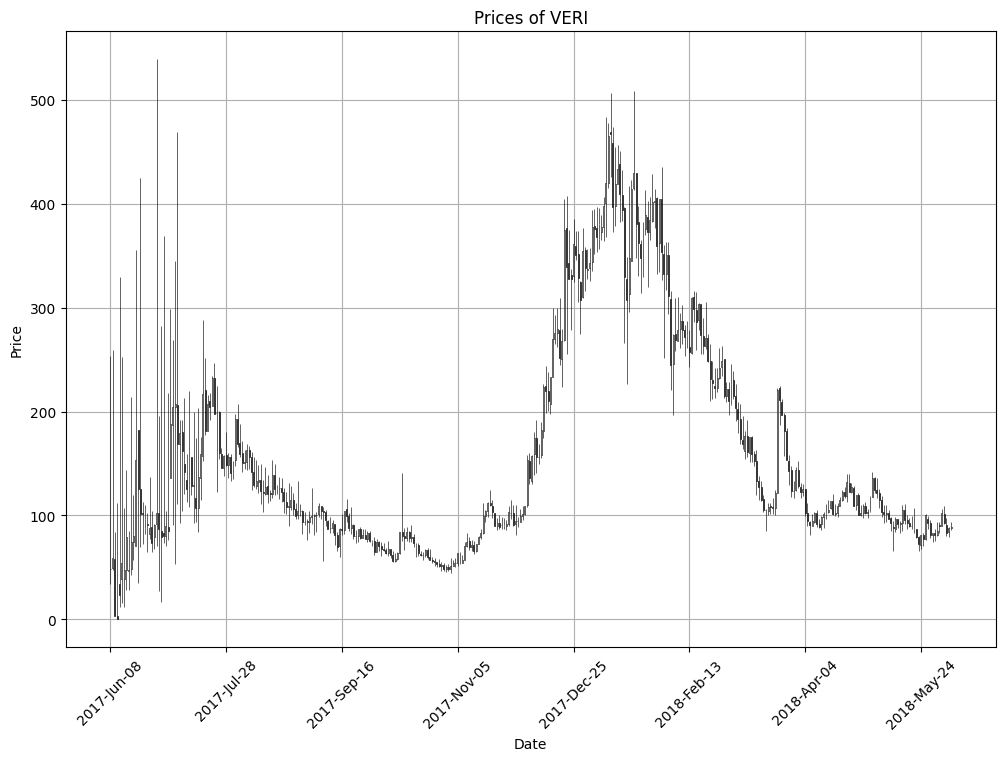

In [73]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [74]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    filtered_data = coins[coins['symbol'] == symbol]
    filtered_data = filtered_data[(filtered_data['date'] >= start_date) & (filtered_data['date'] <= end_date)]
    filtered_data = filtered_data.loc[:,['high', 'low', 'open', 'close', 'date']]
    pnd = -100
    for ind in filtered_data.index:
      if(type(filtered_data['open'][ind]) == np.float64 and type(filtered_data['close'][ind]) == np.float64 and type(filtered_data['high'][ind]) == np.float64):
        o = filtered_data['open'][ind]
        c = filtered_data['close'][ind]
        h = filtered_data['high'][ind]
      else:
        o = max(filtered_data['open'][ind])
        c = max(filtered_data['close'][ind])
        h = max(filtered_data['high'][ind])
      if pnd < h / max(c, o):
        pnd = h / max(c, o)
        day = ind
    return (pnd, filtered_data['date'][day])

In [75]:
coins = pd.read_csv('coins.csv')
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

(1.1428940004366206, '2017-11-29')

Сравните эти значения для разных монет:

In [76]:
coins = pd.read_csv('coins.csv')
data_about_pnd = []
for s in coins['symbol'].unique():
  a = find_most_severe_pump_and_dump(coins, symbol=s, start_date='2017-06-01', end_date='2018-06-01')
  data_about_pnd.append((s, a[0]))
print(data_about_pnd)

[('BTC', 1.1428940004366206), ('LTC', 1.1082257158899496), ('DOGE', 1.2747326203208558), ('VTC', 1.3952095808383234), ('DGB', 1.359942799461642), ('DASH', 1.2031621370259378), ('MAID', 1.291362434422475), ('XLM', 1.332510511325105), ('XVG', 1.726864726979804), ('USDT', 1.099009900990099), ('XEM', 1.1358695652173911), ('ETH', 1.1433508255471652), ('REP', 1.477601285025879), ('DCR', 1.8054444587795122), ('PIVX', 1.3587962962962963), ('LSK', 1.4424778761061947), ('WAVES', 1.2543352601156068), ('ETC', 1.1482493171095107), ('NEO', 1.232142857142857), ('ICN', 2.586337382991436), ('ZEC', 1.3298776561493881), ('GNT', 1.6882121234525305), ('GNO', 1.653659748974773), ('ANT', 1.7336683417085428), ('AE', 1.7482936279178192), ('BAT', 1.2342492522991364), ('VERI', 33.549253731343285), ('FUN', 12.490562327959102), ('PAY', 1.3514021619927934), ('SNT', 1.3861630321910696), ('EOS', 1.3202933985330074), ('GAS', 1.477106227106227), ('MTL', 1.6728538283062646), ('PPT', 3.720797720797721), ('BTM', 7.1779334

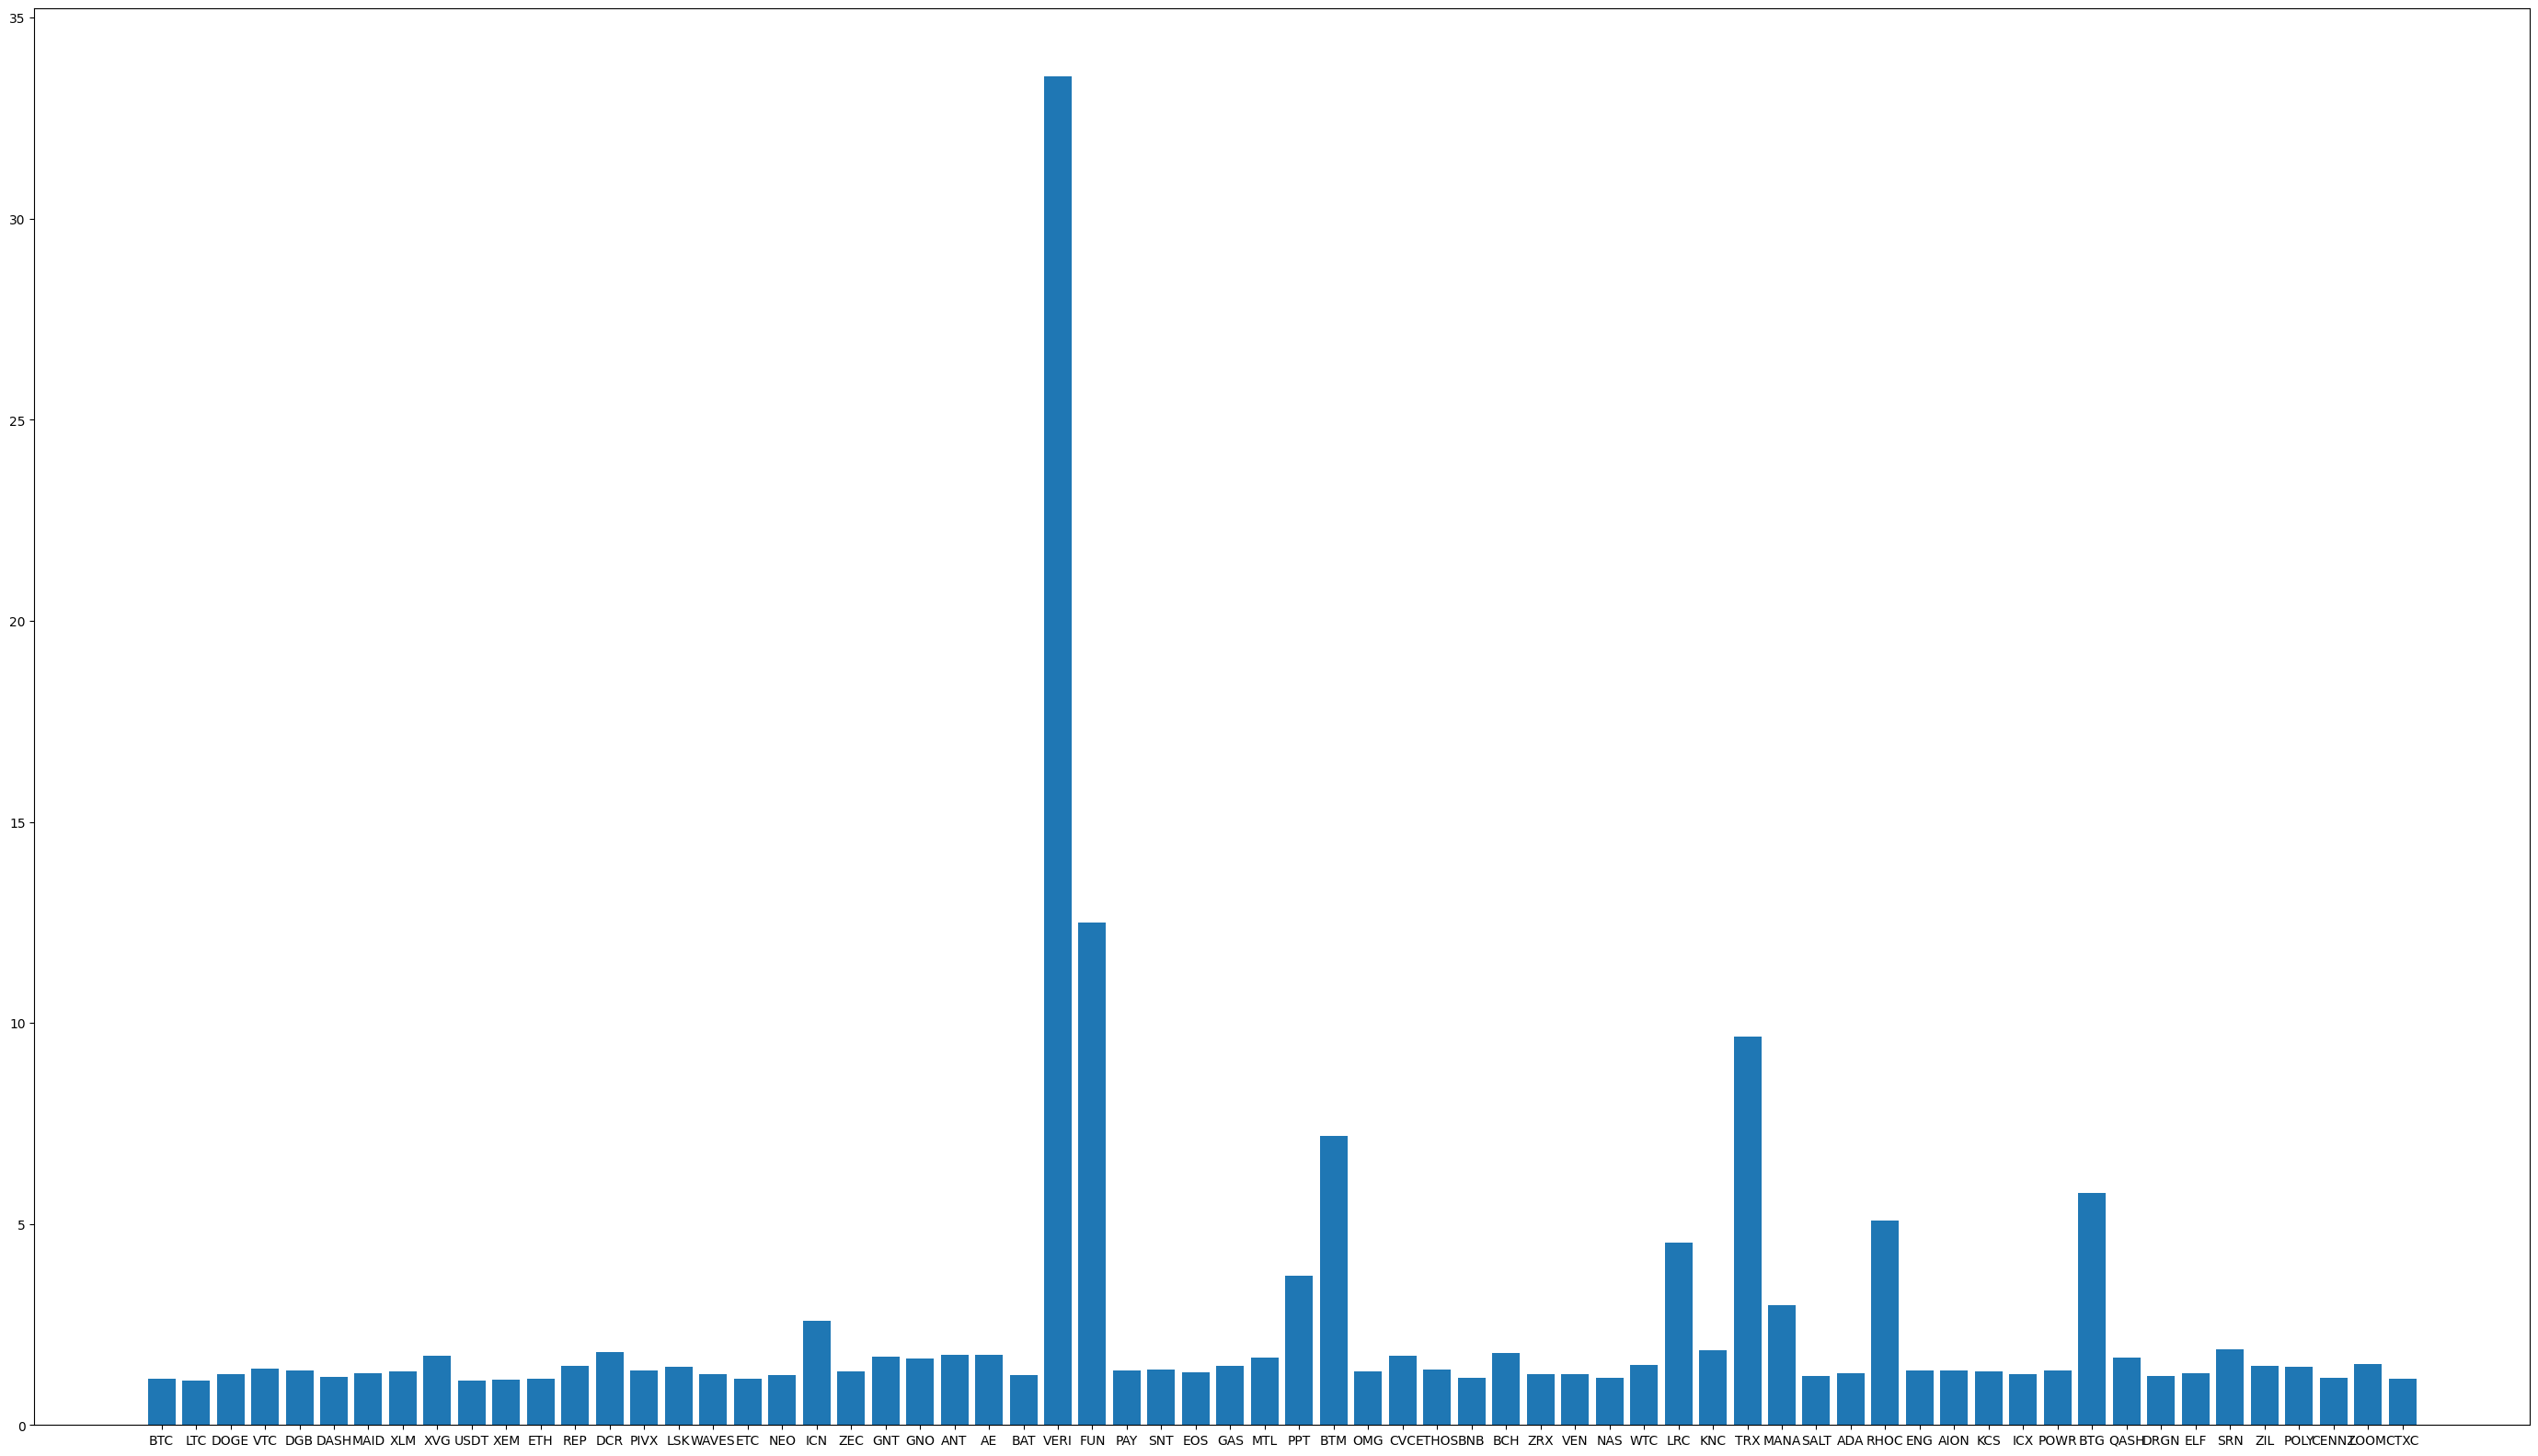

In [81]:
import matplotlib.pyplot as plt

names = [x[0] for x in data_about_pnd]
values = [x[1] for x in data_about_pnd]

fig, ax = plt.subplots(figsize=(35, 20))
plt.bar(names, values)
plt.show()


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [82]:
def compute_roi(coins, investments, start_date, end_date):
    weights = dict()
    start_price = 0
    for key in investments:
      start_price += investments[key]
      ind = coins[(coins['date'] == start_date) & (coins['symbol'] == key)].index[0]
      price = coins['price'][ind]
      weights[key] = investments[key] / price
    end_price = 0
    for key in weights:
      ind = coins[(coins['date'] == end_date) & (coins['symbol'] == key)].index[0]
      price = coins['price'][ind]
      end_price += weights[key] * price
    return (end_price - start_price) / start_price

In [85]:
coins = pd.read_csv('coins.csv')
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [86]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [87]:
import matplotlib.dates as mdates

def plot_bollinger_bands(coins, symbol, window, width):
  # вычисляем скользящее среднее и стандартное отклонение
  updated_coins = coins[coins['symbol'] == symbol]
  rolling_mean = updated_coins['price'].rolling(window).mean()
  rolling_std = updated_coins['price'].rolling(window).std()

  # вычисляем границы Боллинджера
  upper_band = rolling_mean + (rolling_std * width)
  lower_band = rolling_mean - (rolling_std * width)
  
  fig, ax = plt.subplots(figsize=(18, 6))
  ax.plot(updated_coins.index, updated_coins['price'], label='Price')
  ax.plot(rolling_mean.index, rolling_mean, label='Moving Average', color='red')
  ax.fill_between(upper_band.index, upper_band, lower_band, alpha=0.2, label=f'{width}-sigma Bollinger Bands')
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.set_title('Bollinger Bands')
  ax.legend(loc='best')
  ax.xaxis.set_major_locator(mdates.MonthLocator())

  plt.show()



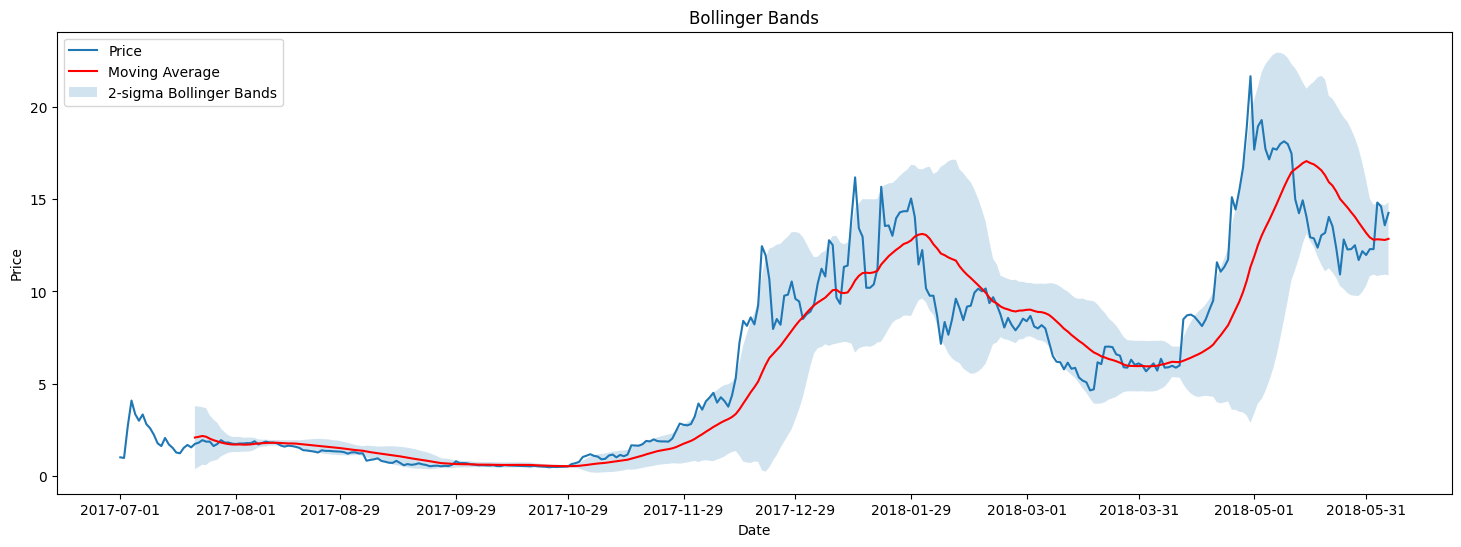

In [88]:
import matplotlib.pyplot as plt

coins = pd.read_csv('coins.csv', index_col='date')
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**



Ответ: правило почти выполнено.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [89]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

def plot_coins_capitalizations(coins, symbols, start_date):
  # Отфильтруем данные по дате и выберем нужные монеты
  filtered_data = coins.loc[start_date:, :]
  coins_of_interest = symbols
  filtered_data = filtered_data[filtered_data['symbol'].isin(coins_of_interest)]

  # Построим график общей капитализации для выбранных монет
  market_cap = filtered_data.pivot_table(values='market', index='date', columns='symbol')
  market_cap.plot(title='Total Market Capitalization', figsize=(18, 8))
  plt.ylabel('Market Cap (USD)')
  plt.show()

  # Расчитаем долей капитализации и построим график
  total_market_cap = market_cap.sum(axis=1)
  market_cap_share = market_cap.div(total_market_cap, axis='index')
  market_cap_share.plot(title='Fraction of capitalisation of selected coins from total market capitalisation', figsize=(18, 8))
  plt.ylabel('Fraction of capitalisation')
  plt.show()

  plt.show()


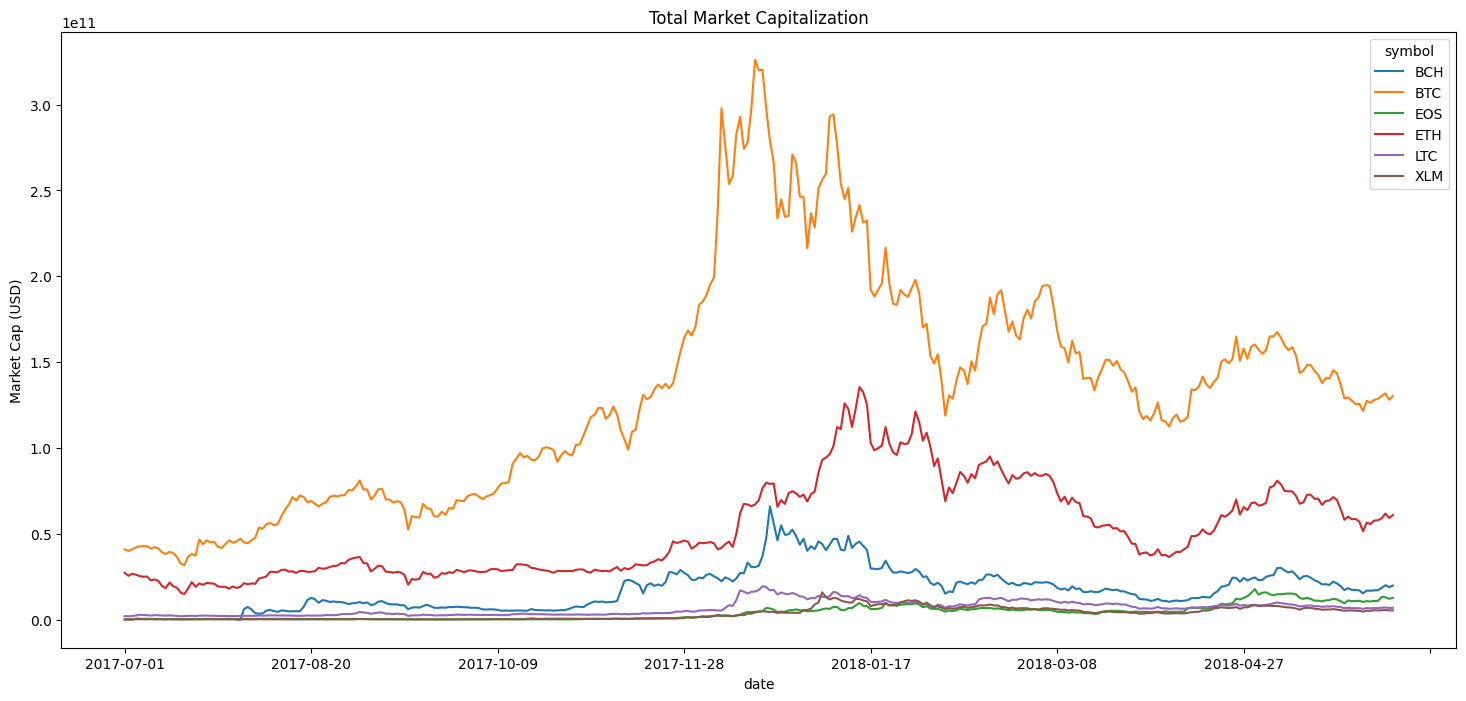

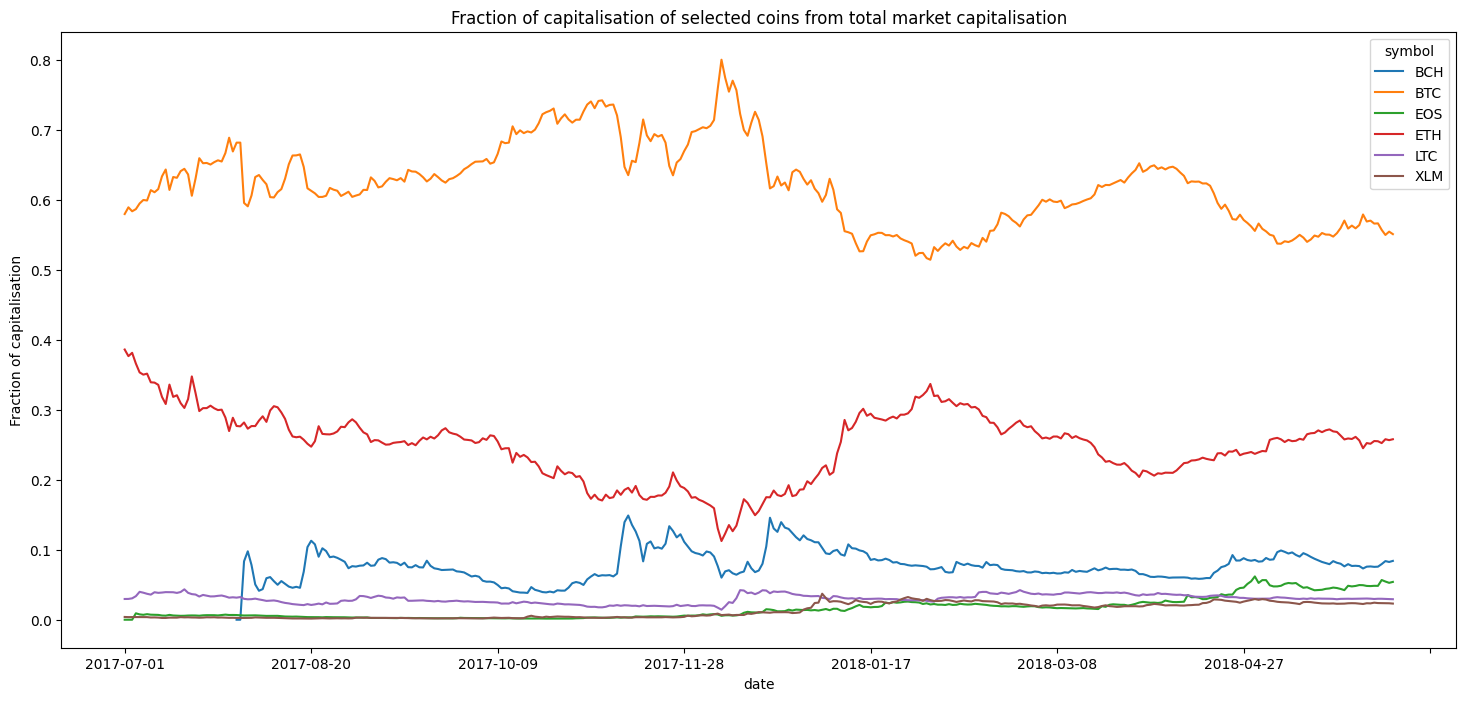

In [107]:
coins = pd.read_csv('coins.csv', index_col='date')
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

In [90]:
start_date = '2017-07-01'
filtered_data = coins.loc[start_date:, :]
coins_of_interest = ['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC']
filtered_data = filtered_data[filtered_data['symbol'].isin(coins_of_interest)]

table = pd.Series([])
for s in coins_of_interest:
  table[s] = filtered_data[filtered_data['symbol'] == s]['market'].corr(filtered_data[filtered_data['symbol'] == 'BTC']['market'])
data = pd.DataFrame(table, columns=['correlation'])
print(data)


     correlation
BTC     1.000000
ETH     0.769317
EOS     0.503997
BCH     0.876574
XLM     0.698019
LTC     0.902565


<ipython-input-90-18f16987d540>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  table = pd.Series([])


Видим, что все эти монеты положительно зависят от биткоина. Больше всего с биткоином коррелирует LTC. Причина такой зависимости заключатеся в том, что биткоин – самая старая и основная криптовалюта, однако монеты в целом будут очень волатильны и зависимы друг от друга. 


## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [91]:
from datetime import datetime, timedelta
def calc_coins_correlations(coins, date, symbols, window, alpha):
    startdate = datetime.strptime(date, '%Y-%m-%d') - timedelta(days=window)  
    filtered_data = coins[startdate:date]

    data = {}
    for symbol in symbols:
        SmoothMA = filtered_data.loc[filtered_data['symbol'] == symbol, 'market'].ewm(alpha=alpha).mean()
        data[symbol] = SmoothMA
    data = pd.DataFrame(data)
    corrmatrix = data.corr()
    
    return corrmatrix

In [92]:
coins = pd.read_csv('coins.csv', index_col='date')

coins.index = pd.to_datetime(coins.index)
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-92-b710f0ebd0f5>:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,1.00,0.06,0.99,0.98,1.00,0.98
ETH,1.00,1.00,0.06,0.98,0.96,1.00,0.98
EOS,0.06,0.06,1.00,0.09,0.08,0.06,0.15
BCH,0.99,0.98,0.09,1.00,1.00,0.99,0.99
XLM,0.98,0.96,0.08,1.00,1.00,0.98,0.99
LTC,1.00,1.00,0.06,0.99,0.98,1.00,0.99
ADA,0.98,0.98,0.15,0.99,0.99,0.99,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [93]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-93-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.68,0.61,0.41,0.65,0.78,0.54
ETH,0.68,1.00,0.99,0.91,0.97,0.98,0.96
EOS,0.61,0.99,1.00,0.95,0.99,0.94,0.99
BCH,0.41,0.91,0.95,1.00,0.94,0.82,0.97
XLM,0.65,0.97,0.99,0.94,1.00,0.93,0.99
LTC,0.78,0.98,0.94,0.82,0.93,1.00,0.89
ADA,0.54,0.96,0.99,0.97,0.99,0.89,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

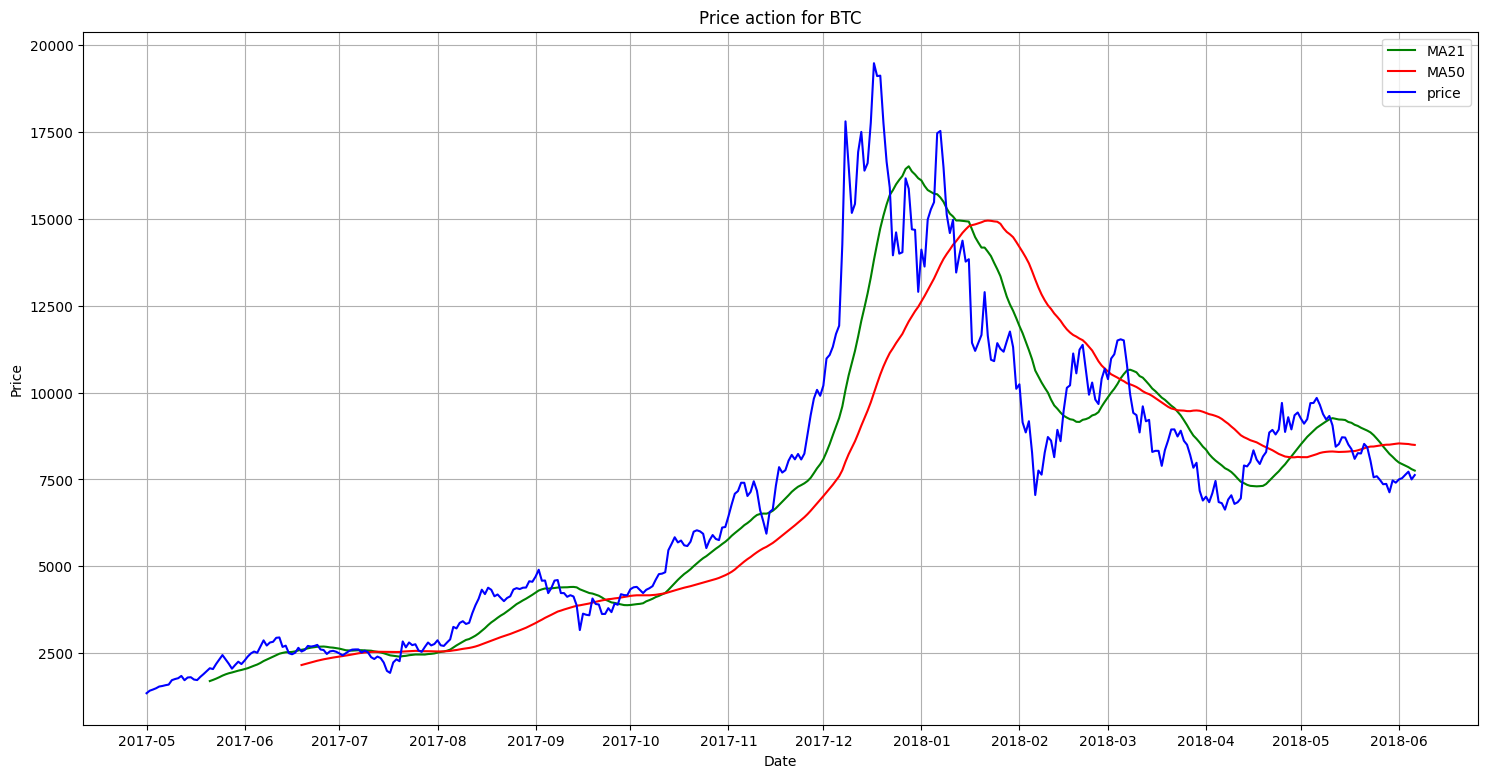

In [94]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(18, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [97]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    df = coins[coins['symbol'] == symbol][start_date:end_date]
    df['SMA1'] = df['close'].rolling(window=lead_window).mean()
    df['SMA2'] = df['close'].rolling(window=lag_window).mean()
    df['multiplier'] = df['close'] / df['close'].shift(1)
    df['cum_multiplier'] = df['multiplier'].cumprod()
    
    df['decision'] = 0
    df.loc[df['SMA1'] / df['SMA2'] >= (1 + threshold), 'decision'] = 1

    df['investment_size'] = df['multiplier']
    df.loc[df['decision'] == 0, 'investment_size'] = 1
    df['investment_size'] = df['investment_size'].cumprod()

    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    axs[0].plot(df['cum_multiplier'], label='Buy and Hold')
    axs[0].plot(df['investment_size'], label='Trading Strategy')
    axs[0].set_title('Investment Size')
    axs[0].legend()

    axs[1].plot(df['close'], label='Price')
    axs[1].plot(df['SMA1'], label='SMA1')
    axs[1].plot(df['SMA2'], label='SMA2')
    axs[1].set_title('Price and Moving Averages')
    axs[1].legend()

    plt.show()

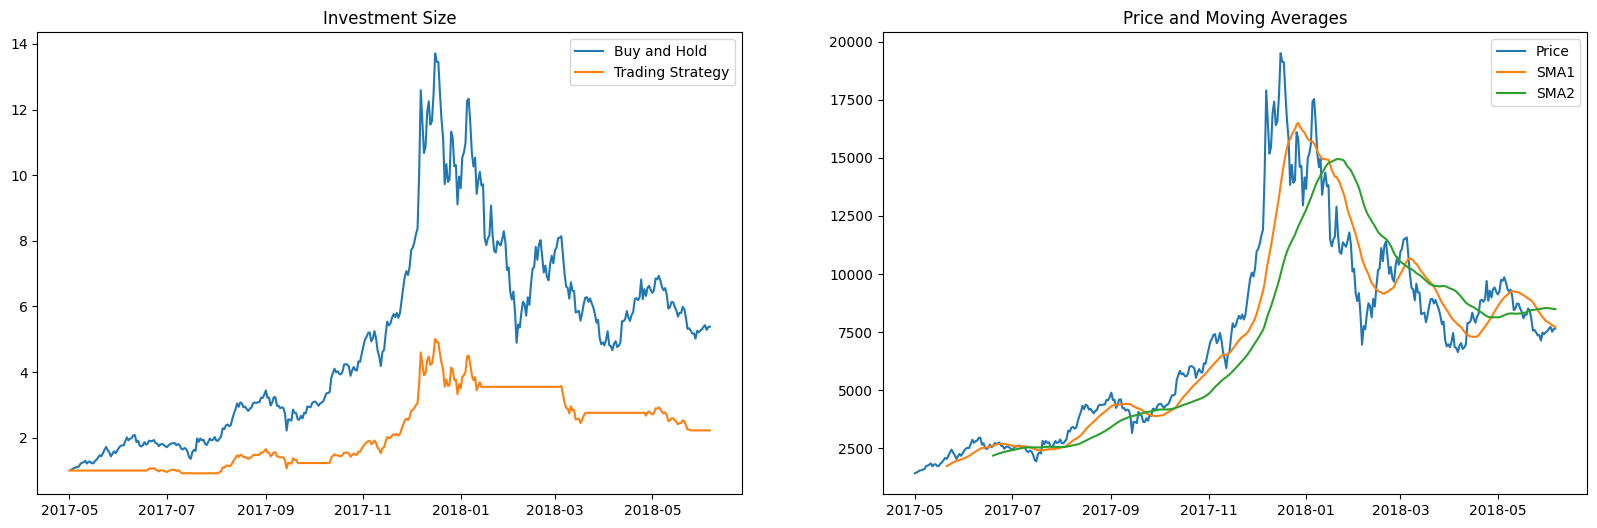

In [98]:
coins = pd.read_csv('coins.csv', index_col='date')
coins.index = pd.to_datetime(coins.index)

plot_moving_averages_strategy(
    coins=coins, 
    symbol='BTC', 
    lead_window=21, 
    lag_window=50, 
    threshold = 0,
    start_date='2017-05-01',
    end_date='2018-08-01'
)

In [99]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
coins = pd.read_csv('coins.csv', index_col='date')
coins.index = pd.to_datetime(coins.index)

symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

Видим, что наша стратегия торгует значительно хуже, чем стратегия "buy and hold". Она очень нестабильна. Если lag достаточно большой, мы больше выигрываем. Чем короче промежутки торговли, тем лучше работает наша стратегия. Чем больше трешхолд, тем больше наша стратегия похожа на вертикальную линию.

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.